![AlphaToOmega](https://i.imgur.com/JdERPuK.png)

## Machine Learning Study Week1

## : Lec 0 ~ 4

### 2017년 12월 27일 안상호

머신러닝, 텐서 플로우, 선형회귀

---

### 목차

1. **Lec00 & Lec01**: 머신러닝의 기본 + TensorFlow 기초 
2. **Lec02**: 선형회귀 기초 
3. **Lec03**: Cost 최소화 알고리즘
4. **Lec04**: 다변수 선형 회귀 
5. **Optional**: Feature Scaling and Normal Equation

---

## Lec00: 머신러닝 OT 

---

## Lec01: 머신러닝의 기본

### Tensorflow의 설치 및 기본적인 operations

+ TensorFlow란?

> edges와 nodes로 구조화된 graph로 프로그램이 구성

![](http://cfile29.uf.tistory.com/image/2256FA33596D8E70299A90)

여기서 nodes는 어떤 동작이 일어나는지에 관한 operation이고 (쉽게 말해 함수)

edges는 이러한 nodes를 동작시키기 위한 Data, Tensor이다.

Data가 여러 Operation 들을 통해 연결되고 연산됨을 생각해보며 밑의 예제들을 풀어나가보자

---

### 1.1. Hello TensorFlow!

- Check installation and version

In [1]:
import tensorflow as tf

tf.__version__

'1.4.1'

- 역시 프로그래밍은 "Hello, World" 부터 시작!

In [2]:
hello = tf.constant("Hello, TensorFlow!") ### hello라는 node

# start a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello)) 

Hello, TensorFlow!


---

### 1.2. Computational Graph

> TensorFlow로 코딩을 하면 크게 3단계로 나누어진다. 
>> 1. Init: 처음에 변수를 만들어 주는 단계
>> 2. Build: 만들어진 변수들을 통해 모델을 만드는 단계
>> 3. Run: 만들어진 모델에 데이터를 주어서 실행 or 그냥 실행 

> 밑의 예제를 통해서는 텐서플로우가 어떠한 방법을 거쳐서 결과를 내는지를 보도록하자

> P.S. 강의에서는 Build -> Feed&Run -> Update 순이다
> [ML lab01](https://youtu.be/-57Ne86Ia8w)

#### 1.2.1. Build graph(tensors) using TensorFlow operations

In [3]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

print("node1:", node1, "node2:", node2)
print("node3: ", node3)

('node1:', <tf.Tensor 'Const_1:0' shape=() dtype=float32>, 'node2:', <tf.Tensor 'Const_2:0' shape=() dtype=float32>)
('node3: ', <tf.Tensor 'Add:0' shape=() dtype=float32>)


- 설명 

    난 노드(op)야! 라고 말하고 있는 것을 확인할 수 있다.

    즉, 노드를 실행을 위해서는 다른 방법이 필요!

#### 1.2.2. Feed data and run graph sess.run(op)

### and

#### 1.2.3. Update variables in the graph (and return values)

In [4]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

('sess.run(node1, node2): ', [3.0, 4.0])
('sess.run(node3): ', 7.0)



---

### 1.3. Data Type

> 텐서플로우는 뉴럴네트워크에 최적화되어 있는 개발 프레임웤이기 때문에, 그 자료형과, 실행 방식이 약간 일반적인 프로그래밍 방식과 상이하다. 그래서 삽질(?)을 많이했다

[조대협의 블로그](http://bcho.tistory.com/1150)

#### 1.3.1. 상수형 (Constant)

간단히 말해서 상수인 값들을 할당한다

- tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
    + value: 상수 값
    + dtype: 저장되는 데이터 타입. tf.float32와 같이 실수, 정수 등의 데이터 타입을 정의한다. 
    + shape: 행렬 차원 정의! m by n 행렬
    + name: 상수의 이름을 정의한다. 


In [4]:
# Build
node1 = tf.constant(3.0, tf.float32)

# Run
sess = tf.Session()
print("sess.run(node1): {}".format(sess.run(node1)))

sess.run(node1): 3.0


#### 1.3.2. 플레이스 홀더 (Placeholder)

간단히 말해 빈 변수를 만들어주고, 값이 입력 되기를 기다리는 것이다!

이렇게 해서 모델을 먼저 만들고나면 어떤 값이든 부여할 수 있게 된다. 

즉, 학습을 위한 학습용 데이터 타입!

- tf.tf.placeholder(dtype,shape,name) 
    + dytpe: 저장되는 데이터 타입
    + shape: 행렬 차원 정의! m by n 행렬
    + name: placeholder의 이름

In [5]:
# Build

node_data1 = 3.0
node_data2 = 1.0
node1 = tf.placeholder(tf.float32)

# Run
sess = tf.Session()
print("sess.run(node1): {}".format(sess.run(node1, feed_dict={node1: node_data1})))
print("sess.run(node1): {}".format(sess.run(node1, feed_dict={node1: node_data2})))

sess.run(node1): 3.0
sess.run(node1): 1.0


`feed_dict` 로 데이터를 할당해주는 것에 주목하자 

#### 1.3.3. 변수형 (Variable)

모델을 통한 학습이 진행될 때, 계속해서 값을 

업데이트하는 식으로 바꾸어주어야 하는 값들이 있다.

그 변수들을 위한 자료형!

`trainable` 값, 즉 학습시 tensorflow가 변경 가능한 값 

- tf.Variable.__init__(initial_value=None, trainable=True, collections=None, validate_shape=True, caching_device=None, name=None, variable_def=None, dtype=None, expected_shape=None, import_scope=None)

In [6]:
node_data = [1,2,3,4,5]

x = tf.placeholder(dtype=tf.float32)

W = tf.Variable([2],dtype=tf.float32)

y = W*x

sess = tf.Session()
sess.run(tf.global_variables_initializer())

result = sess.run(y,feed_dict={x:node_data})

print(result)

[  2.   4.   6.   8.  10.]


밑에서 학습에 따라 변화하는 W를 보도록 하자

---

## Lec02: 선형 회귀 (Linear Regression) 기초

### TensorFlow로 간단한 linear regression을 구현

> 상관 관계에 관해서는 다들 한번씩 들어보았을 것이다. 그렇지만 두변수가 높은 상관 관계를 보이고 있다고 해서 이것들 간에 인과관계가 있는 것은 아니다. 바로 이 회귀 분석 방법이 인과관계를 찾아가는 과정이라고 생각하면 된다. 다음과 같은 Step을 따른다.

>> **Step1**: 가설 설정 - `Hypothesis` (Build)

>> **Step2**: 비용 계산식 설정 - `Cost` (Build)

>> **Step3**: 비용 최소화식 설정 - `Gradient Descent` (Build)

>> **Step4**: 실행 (Run)

---

### 2.1. Hypothesis 설정 

$$H(x) = Wx + b$$

- **Def**
    + X에 대한 Y 값을 예측해주는 가설

In [7]:
import tensorflow as tf

tf.set_random_seed(777)  # 재연을 위한 난수표

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name= 'Weight')
b = tf.Variable(tf.random_normal([1]), name= 'bias')

hypothesis = x_train*W + b

---

### 2.2. Cost 계산

$$cost(W,b) = \frac{1}{m}\sum_{i=1}^{m} (H(x^{(i)}) - y^{(i)})^2$$

- **Def**
    + 우리가 만든 식에 따른 예측 값이 실제 y 값과 얼마나 차이가 나는가?
    
    > H는 예측 값, y는 실제 값

In [8]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

`tf.square()` : 제곱 (2)

`tf.reduce_mean()`: 평균 내주는 것 (1/m) 

---

### 2.3. Cost 최소화

In [9]:
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

---

### 2.4. Run

In [10]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

1. 세션 열고
2. `tf.global_variables_initializer()`: 변수형과 세트! 그래프를 실행하기 전에 초기화하여 W에 지정한 값이 변수에 지정되도록 한다

In [11]:
# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 200 == 0:
        print("Stpe: {}, Cost: {}, Weight: {}, bias: {}".format(step, sess.run(cost), sess.run(W), sess.run(b)))

Stpe: 0, Cost: 20.7623004913, Weight: [-1.05880177], bias: [-0.11754983]
Stpe: 200, Cost: 0.0238858964294, Weight: [ 0.82049912], bias: [ 0.4080478]
Stpe: 400, Cost: 0.00912080984563, Weight: [ 0.88907933], bias: [ 0.25214887]
Stpe: 600, Cost: 0.00348277133889, Weight: [ 0.93145776], bias: [ 0.15581261]
Stpe: 800, Cost: 0.00132989371195, Weight: [ 0.957645], bias: [ 0.0962828]
Stpe: 1000, Cost: 0.000507819058839, Weight: [ 0.97382718], bias: [ 0.05949693]
Stpe: 1200, Cost: 0.000193909931113, Weight: [ 0.98382676], bias: [ 0.03676552]
Stpe: 1400, Cost: 7.40457689972e-05, Weight: [ 0.99000591], bias: [ 0.02271891]
Stpe: 1600, Cost: 2.82737673842e-05, Weight: [ 0.9938243], bias: [ 0.0140388]
Stpe: 1800, Cost: 1.07965161078e-05, Weight: [ 0.99618381], bias: [ 0.00867511]
Stpe: 2000, Cost: 4.12263989347e-06, Weight: [ 0.99764174], bias: [ 0.00536075]


200번의 연산마다 Cost, Weight, bias 순으로 출력해보았다.

데이터 셋에서 생각할 수 있는

$y = x$ 가 $y = 0.997x + 0.005$로 거의 근사 값에 도달 했음을 알 수 있다.

### Placeholder Version

In [12]:
W = tf.Variable(tf.random_normal([1]), name= 'Weight')
b = tf.Variable(tf.random_normal([1]), name= 'bias')

X = tf.placeholder(tf.float32, shape=[None]) ### shope = None 무슨 값들어와도 상관 없음 
y = tf.placeholder(tf.float32, shape=[None])

hypothesis = X*W + b
cost = tf.reduce_mean(tf.square(hypothesis - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], feed_dict = {X: [1,2,3,4,5], y: [2.1,3.1,4.1,5.1,6.1]})
    
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)

(0, 9.5306149, array([ 0.41279173], dtype=float32), array([ 0.65492594], dtype=float32))
(200, 0.0032533661, array([ 1.03690577], dtype=float32), array([ 0.96675861], dtype=float32))
(400, 0.00083946588, array([ 1.01874697], dtype=float32), array([ 1.03231752], dtype=float32))
(600, 0.00021661093, array([ 1.0095228], dtype=float32), array([ 1.06561923], dtype=float32))
(800, 5.5890334e-05, array([ 1.00483716], dtype=float32), array([ 1.08253598], dtype=float32))
(1000, 1.4422332e-05, array([ 1.00245726], dtype=float32), array([ 1.09112847], dtype=float32))
(1200, 3.7224386e-06, array([ 1.00124824], dtype=float32), array([ 1.09549308], dtype=float32))
(1400, 9.6060671e-07, array([ 1.00063431], dtype=float32), array([ 1.09771037], dtype=float32))
(1600, 2.4803353e-07, array([ 1.00032246], dtype=float32), array([ 1.0988363], dtype=float32))
(1800, 6.4208244e-08, array([ 1.00016379], dtype=float32), array([ 1.09940815], dtype=float32))
(2000, 1.6620209e-08, array([ 1.00008345], dtype=float

$y = x + 1.1$ 이 $y = 1.000x + 1.099$으로 거의 근사 값에 도달 했음을 알 수 있다.

### Test out model

In [13]:
print(sess.run(hypothesis, feed_dict = {X: [5]}))
print(sess.run(hypothesis, feed_dict = {X: [2.5]}))
print(sess.run(hypothesis, feed_dict = {X: [1.5, 3.5]}))

[ 6.10011625]
[ 3.5999074]
[ 2.59982395  4.59999084]


---

## Lec03: Cost 최소화 알고리즘

## Linear Regression의 cost 최소화의 TensorFlow 구현

$$cost(W) = \frac{1}{m}\sum_{i=1}^{m} (W(x^{(i)}) - y^{(i)})^2$$

$$cost(W) = \frac{1}{2m}\sum_{i=1}^{m} (W(x^{(i)}) - y^{(i)})^2$$

> 미분시 수식을 간단하게 하기 위한 것
>> 대표적인 cost 최소화 알고리즘인 Gradient Descent 사용

$$W := W - \alpha \frac{\partial}{\partial W}cost(W)$$
$$W := W - \alpha \frac{1}{m} \sum_{i=1}^{m} (W(x^{(i)}) - y^{(i)})x^{(i)}$$

> Cost Function이 반드시 Convex 형태가 되게 할것 (오목 그래프)
>> 이렇게 해야 어디서 출발해도 한점으로 수렴하게 된다

<br>

+ Convex Function 여부 확인하기


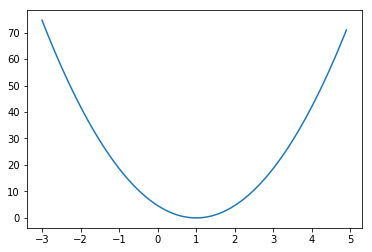

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
tf.set_random_seed(777)  # for reproducibility

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Variables for plotting cost function
W_history = []
cost_history = []

for i in range(-30, 50): 
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)

# Show the cost function
%matplotlib inline

plt.plot(W_history, cost_history)
plt.show()

---

### 3.1. Build - Init

In [15]:
tf.set_random_seed(777)  # for reproducibility

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name= 'Weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

cost = tf.reduce_mean(tf.square(W*X - Y))

---

### 3.2. Build - Minimize

In [16]:
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

---

### 3.3. Run - Graph

In [17]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

(0, 0.043867558, array([ 0.90304542], dtype=float32))
(1, 0.012477879, array([ 0.94829088], dtype=float32))
(2, 0.0035492636, array([ 0.97242182], dtype=float32))
(3, 0.0010095664, array([ 0.98529166], dtype=float32))
(4, 0.00028716505, array([ 0.99215555], dtype=float32))
(5, 8.1682148e-05, array([ 0.99581629], dtype=float32))
(6, 2.3233662e-05, array([ 0.9977687], dtype=float32))
(7, 6.6086832e-06, array([ 0.99880999], dtype=float32))
(8, 1.8797629e-06, array([ 0.99936533], dtype=float32))
(9, 5.3466027e-07, array([ 0.99966151], dtype=float32))
(10, 1.5213425e-07, array([ 0.99981946], dtype=float32))
(11, 4.323115e-08, array([ 0.99990374], dtype=float32))
(12, 1.2296725e-08, array([ 0.99994868], dtype=float32))
(13, 3.4896896e-09, array([ 0.99997264], dtype=float32))
(14, 9.9691633e-10, array([ 0.9999854], dtype=float32))
(15, 2.8358826e-10, array([ 0.99999219], dtype=float32))
(16, 8.0248697e-11, array([ 0.99999583], dtype=float32))
(17, 2.3405278e-11, array([ 0.99999774], dtype=flo

---

### 3.4. GradientDescentOptimizer 사용

In [18]:
tf.set_random_seed(777)  # for reproducibility

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# W = tf.Variable(tf.random_normal([1]), name= 'Weight')
W = tf.Variable(-300.0)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

cost = tf.reduce_mean(tf.square(W*X - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [19]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    print(step, sess.run(W))
    sess.run(train, feed_dict={X: x_data, Y: y_data})
#     sess.run(train, feed_dict={X: x_data, Y: y_data})
#     print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

(0, -300.0)
(1, -19.06665)
(2, -0.33777618)
(3, 0.910815)
(4, 0.99405432)
(5, 0.99960363)
(6, 0.9999736)
(7, 0.99999821)
(8, 0.99999988)
(9, 1.0)
(10, 1.0)
(11, 1.0)
(12, 1.0)
(13, 1.0)
(14, 1.0)
(15, 1.0)
(16, 1.0)
(17, 1.0)
(18, 1.0)
(19, 1.0)
(20, 1.0)


# Quiz! 

다들 강의에서 외부에 있는 데이터를 가져오는 방법은 배우셨을 것입니다!

다들 새로운 데이터를 가지고 회귀모델을 만들어 보도록합시다.

준비한 데이터에 관한 설명입니다. 

> The first column is the population of a city 

> the second column is the profit of a food truck in that city.

이제 아래 질문에 대한 답을 찾아주세요!

In [21]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

# Data Load
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

X_data = data[:,0]
y_data = data[:,1]

- `R`로 치면 `ggplot2`와 비슷한 `matplotlib`으로 데이터의 시각화를 해보십니다.

Text(0,0.5,u'Profit in $10,000s')

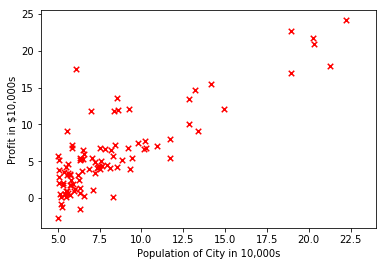

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X_data, y_data, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

+ 위 데이터에 적합한 Weight와 bias를 구하시오

In [25]:
### Your Code

+ 인구 값이 `6.1101` 일 때 푸드트럭의 예상 수익은 얼마입니까?

In [26]:
### Your Code

---

## Lec04: 다변수 선형 회귀

## multi-variable linear regression을 TensorFlow에서 구현하기

---

### 4.1. without Matrix

#### 4.1.1. Build - init

In [23]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x1_data = [73., 93., 89., 96., 73.] 
x2_data = [80., 88., 91., 98., 66.] 
x3_data = [75., 93., 90., 100., 70.] 

y_data = [152., 185., 180., 196., 142.]

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)

Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1')
w2 = tf.Variable(tf.random_normal([1]), name='weight2')
w3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b
print(hypothesis)

Tensor("add_4:0", dtype=float32)


#### 4.1.2. Build - minimize

In [24]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

#### 4.1.3. Run - Graph

In [27]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    if step % 200 == 0:
        print("Step: {} Cost: {} \nPrediction:\n {}  Weight: {} | {} | {}".format(step, cost_val, hy_val, sess.run(w1), sess.run(w2), sess.run(w3)))

Step: 0 Cost: 75184.25 
Prediction:
 [ -82.44986725 -114.04092407 -104.40079498 -115.73933411  -89.22245789]  Weight: [-0.50869608] | [ 1.32636857] | [-0.57816505]
Step: 200 Cost: 37.1485404968 
Prediction:
 [ 160.29223633  178.63548279  183.50038147  197.83311462  134.19862366]  Weight: [ 0.14281878] | [ 1.84976411] | [ 0.03848489]
Step: 400 Cost: 33.3534584045 
Prediction:
 [ 159.83123779  178.95144653  183.35902405  197.73156738  134.6126709 ]  Weight: [ 0.1961917] | [ 1.78234279] | [ 0.05230054]
Step: 600 Cost: 29.9481868744 
Prediction:
 [ 159.39453125  179.25074768  183.22509766  197.63542175  135.00485229]  Weight: [ 0.24673891] | [ 1.71847367] | [ 0.06540171]
Step: 800 Cost: 26.8927574158 
Prediction:
 [ 158.98083496  179.53425598  183.09825134  197.54440308  135.37632751]  Weight: [ 0.2946099] | [ 1.65796876] | [ 0.0778264]
Step: 1000 Cost: 24.1511478424 
Prediction:
 [ 158.58895874  179.80285645  182.97808838  197.45819092  135.72817993]  Weight: [ 0.33994535] | [ 1.6006515] 

---

### 4.2. with Matrix

#### 4.2.1. Build - init

In [28]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) ### n X 3
Y = tf.placeholder(tf.float32, shape=[None, 1]) ### n X 1

W = tf.Variable(tf.random_normal([3, 1]), name='weight') ### (n X 3) X () = (n X 1)
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

위에서 `x1`, `x2`, `x3`로 표시되던 column들이 행렬 형태로 묶여 있는 것을 확인할 수 있다. 

#### 4.2.2. Build - minimize

In [29]:
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

#### 4.2.3. Run - Graph

In [31]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        print("{} Cost: {} \nPrediction:\n {}".format(step, cost_val, hy_val))

0 Cost: 399874.375 
Prediction:
 [[-410.13574219]
 [-489.04779053]
 [-483.70129395]
 [-530.41278076]
 [-368.7444458 ]]
200 Cost: 4.36271762848 
Prediction:
 [[ 151.05220032]
 [ 185.26654053]
 [ 180.81062317]
 [ 193.22831726]
 [ 145.53622437]]
400 Cost: 4.1537566185 
Prediction:
 [[ 151.14730835]
 [ 185.1998291 ]
 [ 180.83784485]
 [ 193.26283264]
 [ 145.43623352]]
600 Cost: 3.96401286125 
Prediction:
 [[ 151.23707581]
 [ 185.1368103 ]
 [ 180.86346436]
 [ 193.29611206]
 [ 145.34106445]]
800 Cost: 3.79164505005 
Prediction:
 [[ 151.32180786]
 [ 185.07725525]
 [ 180.88749695]
 [ 193.32818604]
 [ 145.25054932]]
1000 Cost: 3.63487696648 
Prediction:
 [[ 151.40171814]
 [ 185.02099609]
 [ 180.91011047]
 [ 193.35913086]
 [ 145.16441345]]
1200 Cost: 3.49209022522 
Prediction:
 [[ 151.47709656]
 [ 184.96781921]
 [ 180.93132019]
 [ 193.38899231]
 [ 145.08241272]]
1400 Cost: 3.36187553406 
Prediction:
 [[ 151.54818726]
 [ 184.91766357]
 [ 180.95126343]
 [ 193.4178772 ]
 [ 145.00436401]]
1600 Cost: 

In [32]:
sess.run(hypothesis, feed_dict={X: x_data})

array([[ 151.73820496],
       [ 184.78303528],
       [ 181.00390625],
       [ 193.4989624 ],
       [ 144.79145813]], dtype=float32)

[[152.],
[185.],
[180.],
[196.],
[142.]]

# Quiz! 

당연히 이번에도 있겠죠! 

다들 새로운 데이터를 가지고 다변수 선형 회귀모델을 만들어 보도록합시다.

준비한 데이터에 관한 설명입니다. 

> The first column is the size of the house (in square feet) 

> the second column is the number of bedrooms

> the third column is the price of the house.

이제 아래 질문에 대한 답을 찾아주세요!

+ 위 데이터에 적합한 Weight와 bias를 구하시오

In [34]:
### Your Code

+ 평방 미터 제곱 값이 `2104`, 방의 갯수가 `3`일 때 에측되는 집값은 얼마입니까?

In [35]:
### Your Code


## 고생하셨습니다! 
---

## Optional: Feature Scaling and Normal Equation

---

### 5.1. Feature Scaling 

> 위의 퀴즈에서 본 것처럼 집 평방 미터 제곱 값과 방의 갯수에 관한 두 Feature는 매우 상이한 범위를 가지고 있다. 그래서 Gradient Descent 방법에서 상당히 많은 시간을 요구하게 된다. 그래서 사용하는 방법이 바로 **Feature Scaling** 이다. 상이한 범위를 가진 데이터들의 범위를 같게 만들어 주어서 더욱 빠르게 수렴하도록 만든다. 

>> 스케일링 해주는 방법은 데이터들을 각각 해당 열의 평균에서 뺀 값을 해당 열의 표준편차로 나누어주는 방법이 대표적이다. 혹은 최댓 값에서 최솟값을 빼준 값으로 나누어 주어도 무방하다. 

$$x_1 = \frac{size(feet^2) - mean(size)}{\sigma}$$
$$x_2 = \frac{numBedrooms - mean(num)}{\sigma}$$

#### 5.1.1. 데이터 load

In [33]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)

# Data Load
data = np.loadtxt('data/ex1data2.txt', delimiter=',')

X_data = data[:,0:-1]
y_data = data[:,[-1]] 
# y_data = data[:,-1] 차이는 47로 구성된 벡터냐, 아니면 47X1 행렬이냐
print(X_data.shape, y_data.shape)

((47, 2), (47, 1))


#### 5.1.2.  Feature Sacaling 함수

+ X의 평균 값 리스트와 표준편차 리스트도 함께 반환

In [34]:
from __future__ import division

def FeatureScale(data):
    data_shape = data.shape
    data_mean, data_std = [], []

    data_norm = np.zeros(data_shape)   
    for i in range(data_shape[1]):
        data_i = data[:,i]
        m = data_i.mean()
        s = data_i.std()
        
        data_norm[:,i] = (data_i - m)/(s)
        data_mean.append(m)
        data_std.append(s)
        
    return data_norm, data_mean, data_std

# (X_data - X_data.mean())/X_data.std()
X_norm, X_mean, X_std = FeatureScale(X_data)
y_norm, y_mean, y_std = FeatureScale(y_data)

#### 5.1.3. 학습

In [35]:
X = tf.placeholder(tf.float32, shape = [None, 2])
y = tf.placeholder(tf.float32, shape = [None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name= 'Weight')
b = tf.Variable(tf.random_normal([1]), name= 'bias')

# Build 

h = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(h - y))
# 3e-3
# 1e-10
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Run
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    sess.run(train, feed_dict= {X: X_norm, y: y_norm})
    if step % 200 == 0:
        print(step, sess.run(W), sess.run(b), sess.run(cost, feed_dict= {X: X_norm, y: y_norm}))

(0, array([[-0.40810791],
       [-0.68814003]], dtype=float32), array([ 0.98412555], dtype=float32), 4.2296381)
(200, array([[ 0.82691532],
       [ 0.00126802]], dtype=float32), array([ 0.01730874], dtype=float32), 0.2701382)
(400, array([[ 0.87517917],
       [-0.04359798]], dtype=float32), array([ 0.00030442], dtype=float32), 0.26713592)
(600, array([[ 0.88313013],
       [-0.05154299]], dtype=float32), array([  5.34627270e-06], dtype=float32), 0.26705736)
(800, array([[ 0.88448673],
       [-0.05289959]], dtype=float32), array([  8.62744827e-08], dtype=float32), 0.26705506)
(1000, array([[ 0.88471818],
       [-0.05313111]], dtype=float32), array([ -3.25819127e-09], dtype=float32), 0.26705498)
(1200, array([[ 0.88475728],
       [-0.05317054]], dtype=float32), array([ -1.55982054e-08], dtype=float32), 0.26705498)
(1400, array([[ 0.88476354],
       [-0.05317702]], dtype=float32), array([ -1.53281139e-08], dtype=float32), 0.26705498)
(1600, array([[ 0.88476378],
       [-0.05317748

#### 5.1.4. Prediction

- **input** 값을 Feature Scaling 형태로 입력

In [36]:
# Build

X_test = np.array([[2104, 3]])
X_test= (X_test- X_mean)/X_std
print(X_test)

# Run
print(sess.run(h, feed_dict= {X: X_test} ), sess.run(W))

[[ 0.13141542 -0.22609337]]
(array([[ 0.12829466]], dtype=float32), array([[ 0.88476378],
       [-0.05317748]], dtype=float32))


+ **Prediction** 값이 스케일링 되어 있으므로, 다시 원 값으로 돌림

In [38]:
prediction = 0.12829466*y_std[0] + y_mean[0]

# prediction - 399900
prediction 

356283.03437251452

---

### 5.2. Normal Equation 

> 행렬의 역행렬을 이용하면 Gradient Descent 없이도 바로 Weight 값을 구할 수 있다는 놀라운 사실

>> 하지만 n^3의 컴퓨팅 파워가 소모

$$ X\theta = y$$

$$ \theta = (X^TX)^{-1}X^Ty$$

In [41]:
import numpy as np

data = np.loadtxt('data/ex1data2.txt', delimiter=',')

X_data = data[:,0:-1] ### 47 X 3 -> Transpose 3 X 47
y_data = data[:,[-1]] 

# x_data = np.array([[73., 80., 75.],
#                    [93., 88., 93.],
#                    [89., 91., 90.],
#                    [96., 98., 100.],
#                    [73., 66., 70.]])
# y_data = np.array([[152.],
#                    [185.],
#                    [180.],
#                    [196.],
#                    [142.]])

x_inv = np.linalg.pinv(X_data)

# theta = x_inv.dot(y_data)
theta = np.linalg.pinv(X_data.T.dot(X_data)).dot(X_data.T.dot(y_data))

In [42]:
np.array([[2014, 3]]).dot(theta)

array([[ 334628.80080581]])